## firstly you must convert models by your system
dockerfile docker/tensorrt/Dockerfile

convertors:
* yolov5 (inference/convertors/yolo2tensorrt/bin/yolov5_tensorrt.sh)
* options (inference/convertors/options2tensorrt/convert_numberplate_options_to_onnx.py)
* ocrs (inference/convertors/ocr2tensorrt/convert_ocr_to_onnx.py)

In [1]:
import os
import sys

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"

current_dir = os.getcwd()
nomeroff_net_dir = os.path.join(current_dir, "../../../")
sys.path.append(nomeroff_net_dir)

In [3]:
import matplotlib.pyplot as plt
from glob import glob
import pycuda.autoinit

from nomeroff_net.tools import unzip
from nomeroff_net.pipelines.number_plate_detection_and_reading_trt import NumberPlateDetectionAndReadingTrt

In [4]:
number_plate_detection_and_reading_trt = NumberPlateDetectionAndReadingTrt(
    task="number_plate_detection_and_reading_trt", 
    image_loader="opencv",
    
    # numberplate detector trt paths
    path_to_model=os.path.join(nomeroff_net_dir,
                               "./data/model_repository/yolov5s/1/model.engine"),
    plugin_lib=os.path.join(nomeroff_net_dir, 
                            "./data/model_repository/yolov5s/1/libmyplugins.so"),
    
    # numberplate classification trt paths
    path_to_classification_model=os.path.join(nomeroff_net_dir,
                                              "./data/model_repository/numberplate_options/1/model.trt"),
    options = {
        "class_region": [
                "military",
                "eu_ua_2015",
                "eu_ua_2004",
                "eu_ua_1995",
                "eu",
                "xx_transit",
                "ru",
                "kz",
                "eu-ua-fake-dpr",
                "eu-ua-fake-lpr",
                "ge",
                "by",
                "su",
                "kg",
                "am"
            ],
            "count_lines": [
                1,
                2,
                3
            ],
    },
    
    # numberplate text recognition trt paths
    prisets={
        "eu_ua_2004_2015": {
            "for_regions": ["eu_ua_2015", "eu_ua_2004"],
            "model_path": os.path.join(nomeroff_net_dir, 
                                       "./data/model_repository/ocr-eu_ua_2004_2015/1/model.trt")
        },
        "eu_ua_1995": {
            "for_regions": ["eu_ua_1995"],
            "model_path": os.path.join(nomeroff_net_dir,
                                       "./data/model_repository/ocr-eu_ua_1995/1/model.trt")
        },
        "eu": {
            "for_regions": ["eu"],
            "model_path": os.path.join(nomeroff_net_dir,
                                       "./data/model_repository/ocr-eu/1/model.trt")
        },
        "ru": {
            "for_regions": ["ru", "eu-ua-ordlo-lpr", "eu-ua-ordlo-dpr"],
            "model_path": os.path.join(nomeroff_net_dir,
                                       "./data/model_repository/ocr-ru/1/model.trt")
        },
        "kz": {
            "for_regions": ["kz"],
            "model_path": os.path.join(nomeroff_net_dir,
                                       "./data/model_repository/ocr-kz/1/model.trt")
        },
        "ge": {
            "for_regions": ["ge"],
            "model_path": os.path.join(nomeroff_net_dir,
                                       "./data/model_repository/ocr-ge/1/model.trt")
        },
        "su": {
            "for_regions": ["su"],
            "model_path": os.path.join(nomeroff_net_dir,
                                       "./data/model_repository/ocr-su/1/model.trt")
        }
    },
    default_label = "eu",
)

Loading weights from checkpoint (/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/tools/../../data/./models/np_points_craft/craft_mlt/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/tools/../../data/./models/np_points_craft/craft_refiner/craft_refiner_CTW1500_2020-02-16.pth)


[TensorRT] INFO: [MemUsageChange] Init CUDA: CPU +524, GPU +0, now: CPU 2654, GPU 5045 (MiB)
[TensorRT] INFO: Loaded engine size: 24 MB
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine begin: CPU 2679 MiB, GPU 5045 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +714, GPU +316, now: CPU 3403, GPU 5381 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +125, GPU +58, now: CPU 3528, GPU 5439 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +0, now: CPU 3528, GPU 5423 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine end: CPU 3528 MiB, GPU 5423 MiB
[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation begin: CPU 3504 MiB, GPU 5423 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +8, now: CPU 3504, GPU 5431 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +0, GPU +8, now: CPU 3504, GPU 5439 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation end: CPU 3504 MiB, GPU 5473

[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +1, GPU +8, now: CPU 3547, GPU 5709 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +0, now: CPU 3546, GPU 5693 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine end: CPU 3546 MiB, GPU 5693 MiB
[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation begin: CPU 3529 MiB, GPU 5693 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +8, now: CPU 3529, GPU 5701 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +0, GPU +8, now: CPU 3529, GPU 5709 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation end: CPU 3532 MiB, GPU 5715 MiB
[TensorRT] WARNING: The logger passed into createInferRuntime differs from one already provided for an existing builder, runtime, or refitter. TensorRT maintains only a single logger pointer at any given time, so the existing value, which can be retrieved with getLogger(), will be used instead. In order to use a new logger, first 

In [5]:
result = number_plate_detection_and_reading_trt(glob(os.path.join(nomeroff_net_dir,
                                                                  './data/examples/oneline_images/*')))

[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation begin: CPU 4694 MiB, GPU 6392 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +8, now: CPU 4694, GPU 6400 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +0, GPU +10, now: CPU 4694, GPU 6410 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation end: CPU 4694 MiB, GPU 6414 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +0, now: CPU 4694, GPU 6400 (MiB)
[TensorRT] ERROR: 1: [convolutionRunner.cpp::executeConv::454] Error Code 1: Cudnn (CUDNN_STATUS_BAD_PARAM)
[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation begin: CPU 4739 MiB, GPU 6428 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +8, now: CPU 4739, GPU 6436 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +0, GPU +8, now: CPU 4739, GPU 6444 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] ExecutionContext creation end: CPU 4739 MiB, GPU 6448 MiB
[TensorRT] INFO: [Mem

In [6]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['']


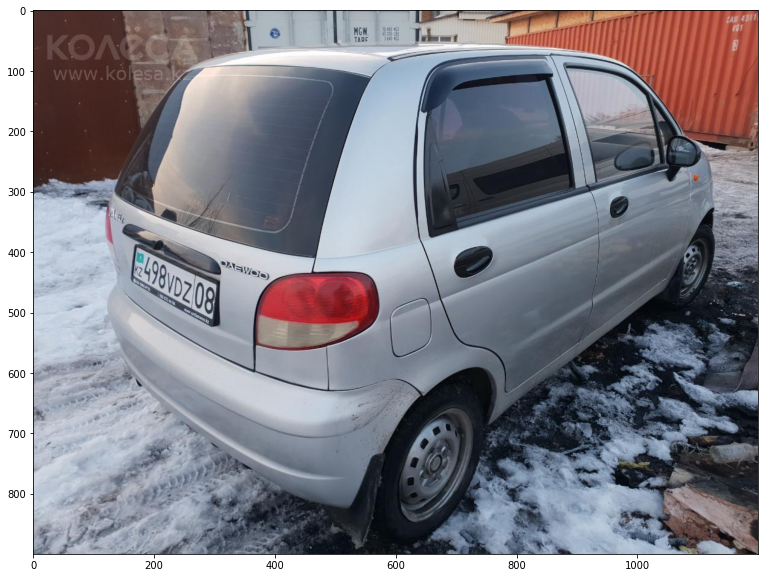

['M556BX159']


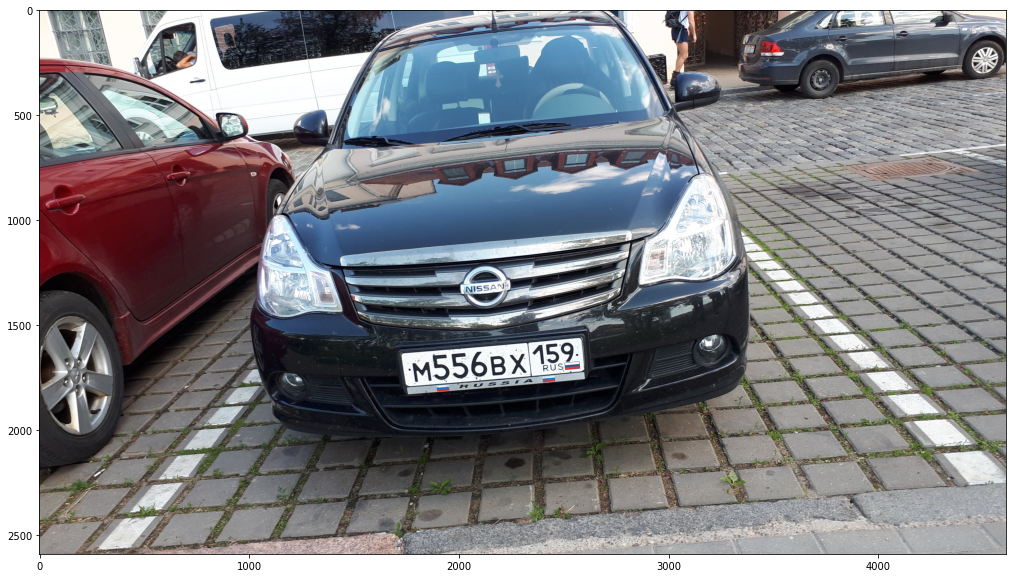

['AC4921CB']


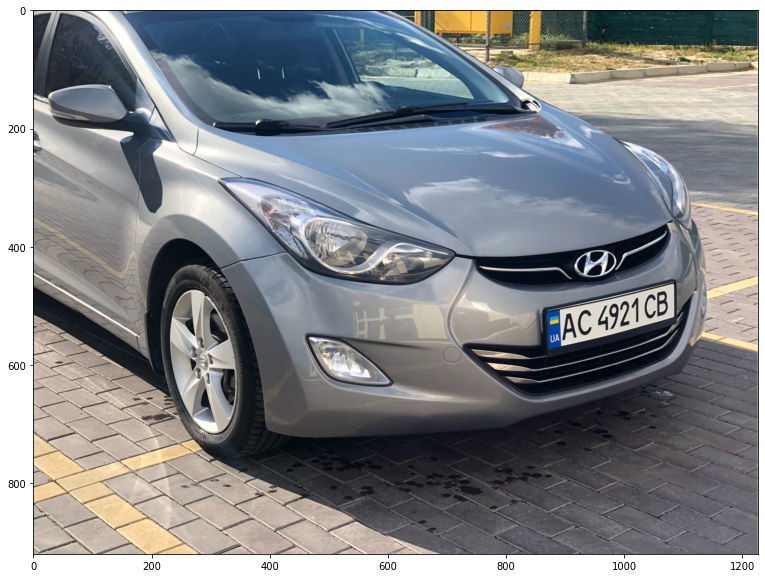

['RP70012', 'JJF509']


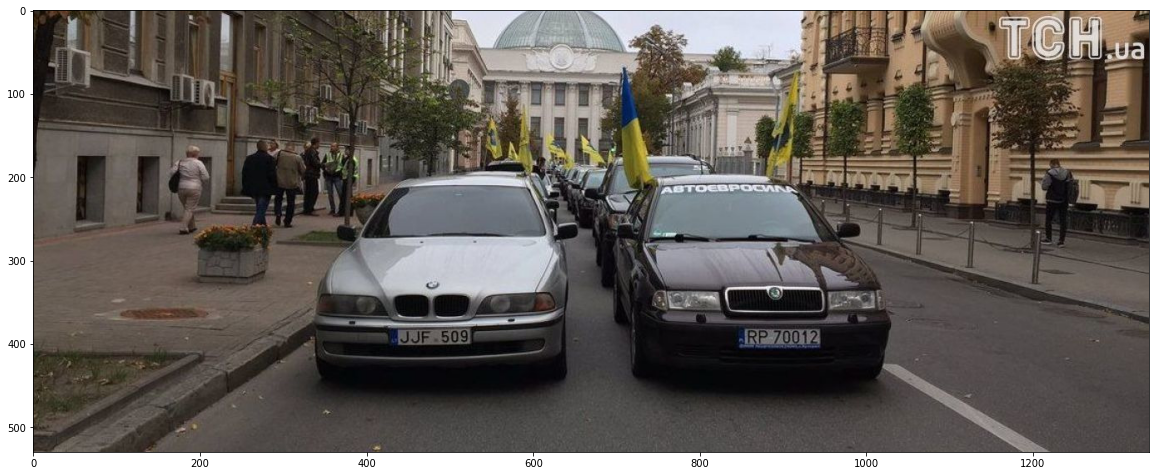

['В8233ХА']


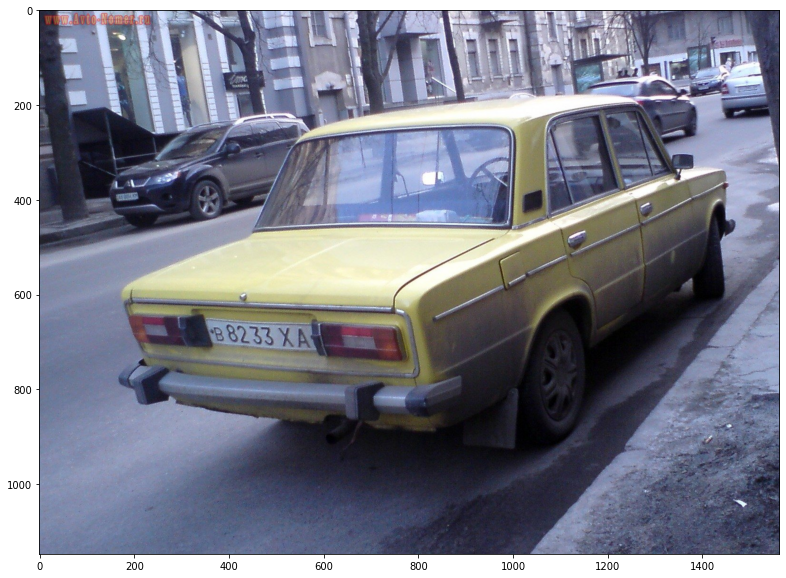

['AA8809PT']


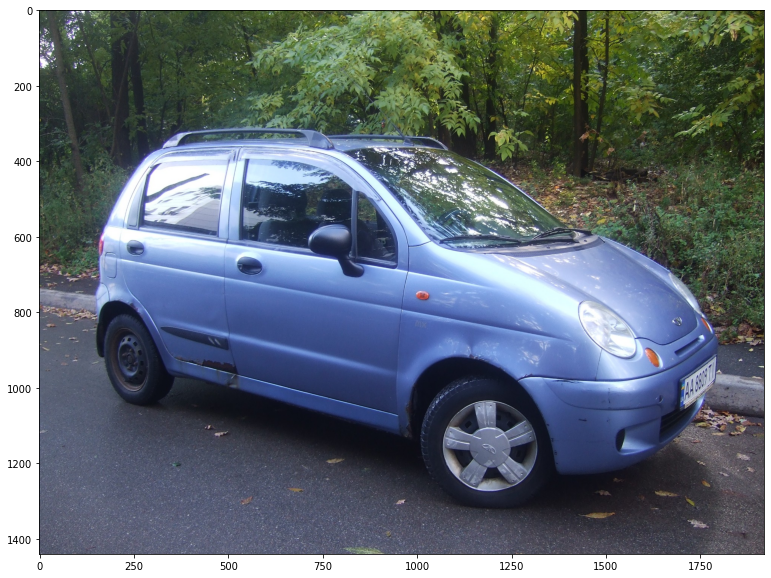

['OO964GG']


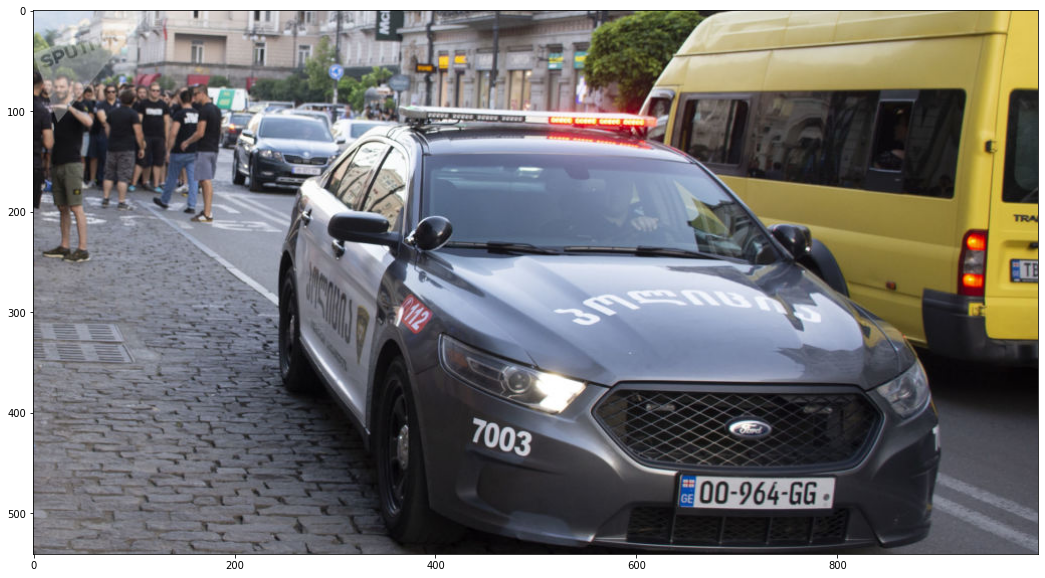

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, np in zip(images, texts):
    print(np)
    plt.imshow(img)
    plt.show()